<img src="https://www.bestdesigns.co/uploads/inspiration_images/4350/990__1511457498_404_walmart.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**


# **LIBRAIRIES**

In [ ]:


import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# **DATA**

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/FULLSTACK/FULLSTACK/PROJET/4.WALMART SALES/Walmart_Store_sales.csv")

data.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
8,14.0,10-12-2010,2600519.26,0.0,30.54,3.109,NaN,NaN
9,3.0,NaN,418925.47,0.0,60.12,3.555,224.132020,6.833


# **PART 1: EDA**


In [ ]:

# number of rows
print("Number of rows : {}".format(data.shape[0]))
print("Number of columns : {}".format(data.shape[1]))



Number of rows : 150
Number of columns : 8


In [ ]:
print("Number of duplicate rows: ",data.duplicated().sum())

Number of duplicate rows:  0


In [ ]:
print("Basics statistics: ")
data.describe(include='all')

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [ ]:

# Calculate missing values
MissingValue = data.isnull().sum()
MissingValue_df = MissingValue.to_frame(name='MissingValue')

#  missing percent of missing values
MissingPercent = round((100 * MissingValue / data.shape[0]),2)
MissingPercent_df = MissingPercent.to_frame(name='Pourcentage_Missing %')

# Merge both dataframe on index
Merged_df = pd.merge(MissingValue_df, MissingPercent_df, left_index=True, right_index=True)
print (Merged_df)


              MissingValue  Pourcentage_Missing %
Store                    0                   0.00
Date                    18                  12.00
Weekly_Sales            14                   9.33
Holiday_Flag            12                   8.00
Temperature             18                  12.00
Fuel_Price              14                   9.33
CPI                     12                   8.00
Unemployment            15                  10.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


# **PREPROCESSING**

In [ ]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(data)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False,
            autosize=False, height=800, width = 800)
fig.show()

On this bivariate analysis, we can see potential outliers on CPI 'and' 'Unemployment' columns
Let's calculate it for each numerical feature to be sure

**In this case, drop lines containing invalid outliers,** defined as those that don't fall within the range : $[\bar{X} - 3\sigma, \bar{X} + 3\sigma]$.

This concerns the columns : *Temperature*, *Fuel_price*, *CPI* and *Unemployment*

In [ ]:


col = ["Temperature", "Fuel_Price", "CPI", "Unemployment"]

list_i = []

for c in col:
    mean_col = data[c].mean()
    std_col = data[c].std()

    # Appliquer la condition pour vérifier si les valeurs sont dans l'intervalle (mean - 3*std) < value < (mean + 3*std)
    condition = (data[c] < mean_col + 3 * std_col) & (data[c] > mean_col - 3 * std_col)

    # Identifier les indices des lignes qui ne respectent pas la condition
    list_i.extend(data[~condition].index.tolist())  # ~condition pour inverser la condition et obtenir les lignes à supprimer

# Supprimer les lignes par indices
data = data.drop(list_i).reset_index(drop=True)

# Afficher le DataFrame après modification
print(data)
print("...Done, number of lines remaining : ", list_i.count)



    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0     6.0  18-02-2011    1572117.54           NaN        59.61       3.045   
1    13.0  25-03-2011    1807545.43           0.0        42.38       3.435   
2     6.0  28-05-2010    1644470.66           0.0        78.89       2.759   
3    15.0  03-06-2011     695396.19           0.0        69.80       4.069   
4    20.0  03-02-2012    2203523.20           0.0        39.93       3.617   
..    ...         ...           ...           ...          ...         ...   
93    3.0  07-01-2011           NaN           0.0        53.35       2.976   
94    3.0  04-06-2010     396968.80           0.0        78.53       2.705   
95    3.0  19-10-2012     424513.08           0.0        73.44       3.594   
96   14.0  18-06-2010    2248645.59           0.0        72.62       2.780   
97   19.0  20-04-2012    1255087.26           0.0        55.20       4.170   

           CPI  Unemployment  
0   214.777523         6.858  
1

In [ ]:
# On the bivariate analysis, we can see also Holiday-Flag as only 2 values as a boolean :
# we can also check if Store retrieve only number of stores
# --> let's check if we can encode them later
print ("Holiday Flag values: ",data["Holiday_Flag"].unique())
print ("Store values: ",data['Store'].unique())

Holiday Flag values:  [nan  0.  1.]
Store values:  [ 6. 13. 15. 20.  3.  8. 18.  7.  1. 17.  5. 19. 16.  4.  2. 14. 10.  9.
 11.]


**Create usable features from the *Date* column :** while creating new columns that contain the following numeric features :
- *year*
- *month*
- *day*
- *day of week*

In [ ]:
#transform Date
data['Date']=pd.to_datetime(data['Date'], format='%d-%m-%Y')

# create each new characteristics
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day_of_week
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
2,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
3,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0,4.0
4,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0


In [ ]:
#we can notice that day_of_week has only 4 as value...let's check if there is other values
print(data['day_of_week'].unique())

[ 4. nan]


In [ ]:
#column Date is not usefull anymore
#neither day of week cause it has an unique value : 4
data.drop(['Date','day_of_week'], axis=1, inplace=True)

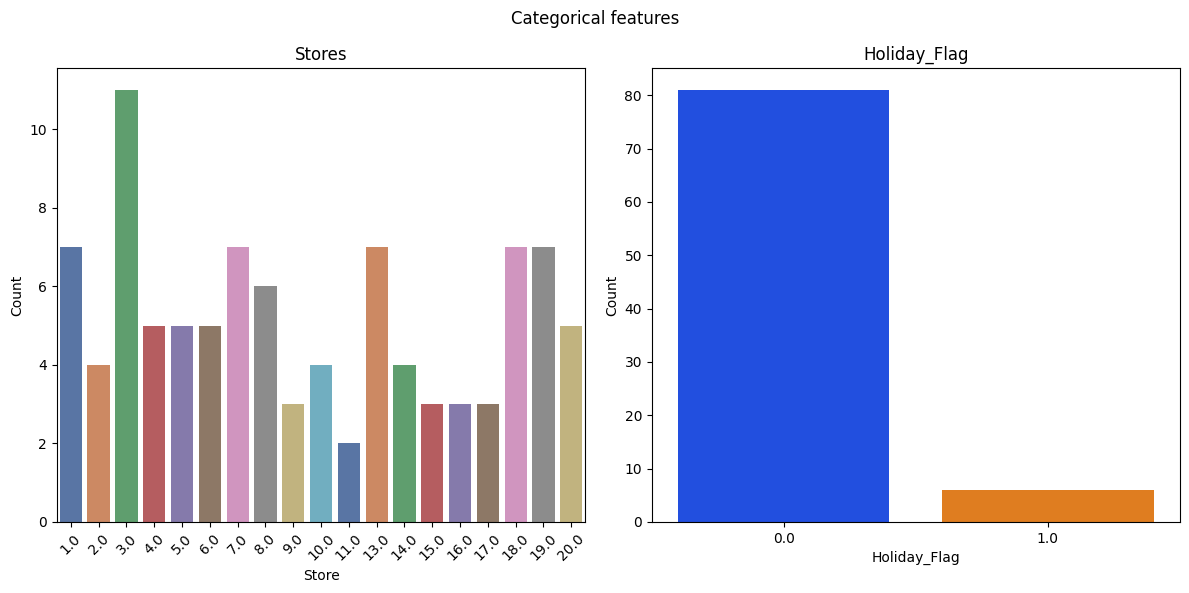

Percentage of holiday flag: 6.12 %


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for "Store"
store_counts = data['Store'].value_counts()
sns.barplot(x=store_counts.index, y=store_counts.values, ax=axes[0], hue=store_counts.index, palette='deep', legend=False)
axes[0].set_title('Stores')
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for "Holiday_Flag"
holiday_counts = data['Holiday_Flag'].value_counts()
sns.barplot(x=holiday_counts.index, y=holiday_counts.values, ax=axes[1], hue=holiday_counts.index, palette='bright',legend=False)
axes[1].set_title('Holiday_Flag')
axes[1].set_xlabel('Holiday_Flag')
axes[1].set_ylabel('Count')

plt.suptitle('Categorical features')
plt.tight_layout()
plt.show()

# Percentage of 'Holiday_Flag' with value 1
holiday_flag_counts = data['Holiday_Flag'].value_counts()
percentage_holiday_flag_1 = (holiday_flag_counts[1] / len(data['Holiday_Flag'])) * 100
print(f"Percentage of holiday flag: {percentage_holiday_flag_1:.2f} %")

According to these graphs, we observe figures indicated for all the stores, although there is an imbalance between the different stores.

Regarding the Holiday Flag data, we logically observe fewer sales on holidays (6.67%), where activity is more limited.



**Drop lines where target values are missing :**
 - Here, the target variable (Y) corresponds to the column *Weekly_Sales*. We can notice that there are some missing values in this column.
 - We never use imputation techniques on the target : it might create some bias in the predictions !
 - Then, we will just drop the lines in the dataset for which the value in *Weekly_Sales* is missing.

In [ ]:
data = data.dropna(subset=['Weekly_Sales'])
data.shape

(90, 10)

In [ ]:
#lets update now the value of missing values
# Calculate missing values
MissingValue = data.isnull().sum()

print(MissingValue)

Store            0
Weekly_Sales     0
Holiday_Flag    10
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
year            10
month           10
day             10
dtype: int64


**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*


In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "Weekly_Sales"

X = data.drop(target_variable, axis = 1)
Y = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
X.head()

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
2    1644470.66
3     695396.19
4    2203523.20
Name: Weekly_Sales, dtype: float64

X :


,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,NaN,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0
2,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0
3,15.0,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0
4,20.0,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0


#### Preprocessings with scikit-learn

 **Explanatory variables (X)**
We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

 - Categorical variables : Store, Holiday_Flag
 - Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day

In [ ]:
# Preprocessings
# Divide dataset into train set & test set

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [ ]:
# Feature definitions

numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day']
categorical_features = ['Store', 'Holiday_Flag']


In [ ]:
 ### Preprocessing definition

# Put here all the preprocessings
print("standardizing numerical features...")
numeric_transformer = Pipeline(
    steps=[( "imputer",
            SimpleImputer(strategy="mean"),),
        ("scaler", StandardScaler()),])

print("Encoding categorical features")
categorical_transformer = Pipeline(steps=[
        ( "imputer", SimpleImputer(strategy="most_frequent"),),
        ( "encoder", OneHotEncoder(drop="first"),),])

preprocessor = ColumnTransformer(transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])


standardizing numerical features...
Encoding categorical features


In [ ]:
# Preprocessings on train set

print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)


# Preprocessings on test set

print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(X_test)


Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
83   16.0           0.0        61.79       2.711  189.523128         6.868   
43    5.0           0.0        69.17       3.594  224.019287         5.422   
23   19.0           0.0        33.26       3.789  133.958742         7.771   
6     8.0           0.0        82.92       3.554  219.070197         6.425   
64    1.0           0.0        74.78       2.854  210.337426         7.808   

      year  month   day  
83  2010.0    7.0   9.0  
43  2012.0   10.0  19.0  
23  2011.0    3.0  25.0  
6   2011.0    8.0  19.0  
64  2010.0    5.0  14.0  
Performing preprocessings on test set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
2     6.0           0.0        78.89       2.759  212.412888         7.092   
14    7.0           0.0        38.26       2.725  189.704822         8.963   
55   11.0           0.0        52.77       3.510  223.9170

# **PART 2 : BASELINE MODEL (linear regression)**


In [ ]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")


Predictions on training set...
...Done.


In [ ]:

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")


Predictions on test set...
...Done.


In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9868327769375977
R2 score on test set :  0.9351220145872656


In [ ]:
 #we can use the coefficients of the regression to estimate the importance of each feature for the prediction.

regressor.coef_


array([  -11520.27507041,   -57817.47581189,   720656.92719384,
          32209.95985725,    -7481.77051714,    17057.92627657,
         -49645.42056052,   271351.16094925, -1251588.0121637 ,
        2210802.33343026, -1227822.85184374,    99880.65843601,
        -617603.1551358 ,  -656894.86121101, -1103225.92257494,
        1805912.02244254,   219302.0691958 ,  2073764.18186615,
        1019973.72954148,   595670.4682691 ,  -576278.43221762,
         862696.76618873,   994166.26976418,  1334722.6345203 ,
         592603.70213288,   -53620.02192415])

In [ ]:
#in a dataframe we can link the values to the features
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'day', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_20.0', 'x1_1.0']


In [ ]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])

# Compute abs() and sort values for coefficients
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
year,7.481771e+03
Temperature,1.152028e+04
month,1.705793e+04
Unemployment,3.220996e+04
day,4.964542e+04
x1_1.0,5.362002e+04
Fuel_Price,5.781748e+04
x0_6.0,9.988066e+04
x0_11.0,2.193021e+05
x0_2.0,2.713512e+05


In [ ]:

# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False,
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

# **PART 3 : REGULARIZED REGRESSION MODELS**

In [ ]:
#  Ridge
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, Y_train)

Y_train_pred = ridge_model .predict(X_train)
Y_test_pred = ridge_model .predict(X_test)


# Print R²scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9643342167235034
R2 score on test set :  0.8811900958706692


In [39]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]}

gridsearch = GridSearchCV(regressor, param_grid = params, cv = 10, verbose = 1) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)


Grid search...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
...Done.
Best hyperparameters :  {'alpha': 0.01}
Best R2 score :  0.9614504818457222


In [40]:
 #R2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))#

R2 score on training set :  0.9860943774773433
R2 score on test set :  0.9387472424418062


In [41]:
#  Lasso
lasso_model = Lasso(alpha=0.05, max_iter=100000)
lasso_model.fit(X_train, Y_train)

Y_train_pred = lasso_model.predict(X_train)
Y_test_pred =lasso_model.predict(X_test)


# Print R² scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9868327754158814
R2 score on test set :  0.9351301244119682


In [42]:
# Perform grid search - Lasso
print("Grid search...")
regressor =Lasso(max_iter=100000)
# Grid of values to be tested
params = {'alpha': [1, 2, 3, 5, 1, 2, 5, 10, 50, 100, 200, 300, 400, 500,600]}


Grid_lasso = GridSearchCV(regressor, param_grid = params, cv = 10, verbose = 1) # cv : the number of folds to be used for CV
Grid_lasso.fit(X_train, Y_train)
print("...Done.")

print("Best hyperparameters : ", Grid_lasso.best_params_)
print("Best R2 score : ", Grid_lasso.best_score_)

Grid search...
Fitting 10 folds for each of 15 candidates, totalling 150 fits
...Done.
Best hyperparameters :  {'alpha': 50}
Best R2 score :  0.9618106233913128


In [43]:
# Print R² scores
print("R2 score on training set : ", Grid_lasso.score(X_train, Y_train))
print("R2 score on test set : ", Grid_lasso.score(X_test, Y_test))

R2 score on training set :  0.9864547441045515
R2 score on test set :  0.9385389592092416


# **CONCLUSION**

While comparing the scores and the difference between the training and test scores, GridLasso seems to be the best one, but the Linear Regression model is very close behind, almost similar. It offers a good balance between a high training score and a good test score.

The Ridge and Lasso models (including GridSearch) show similar performance to linear regression, with marginal improvements, but linear regression remains very competitive and simpler.

It might be interesting to try more complex models, such as ensemble models (e.g., Random Forest or XGBoost), to explore more robust models.

